Primeras filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2   

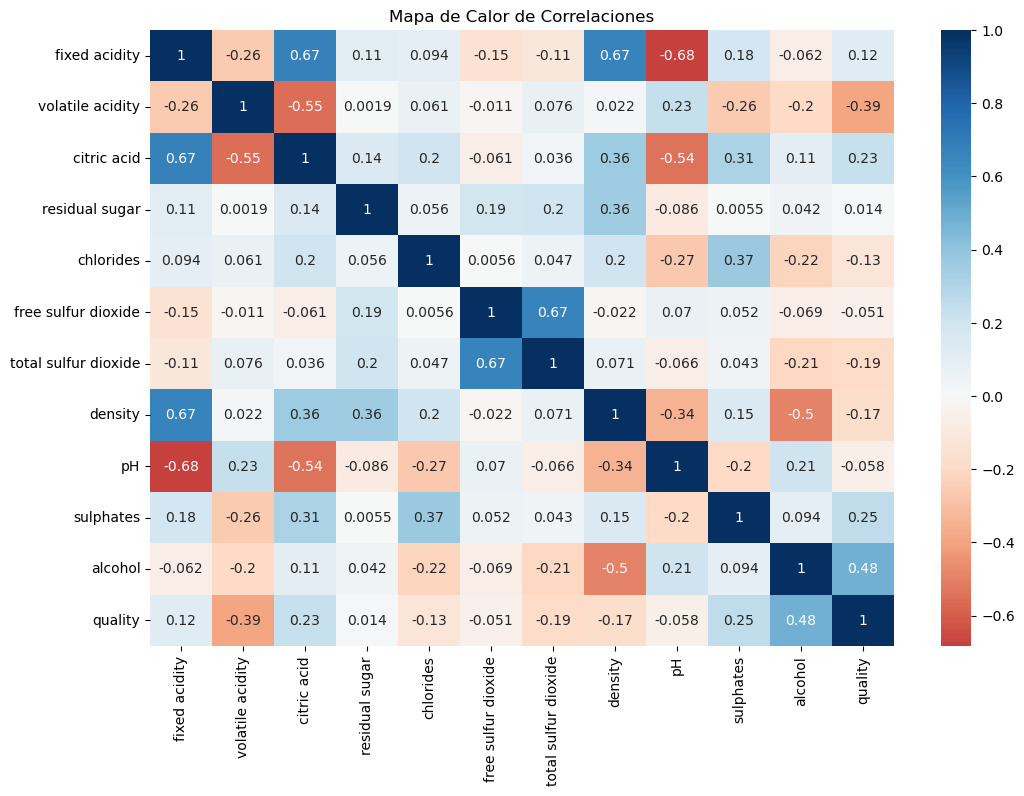

C:\Users\SM ZONA GAMER\AppData\Local\Temp\ipykernel_6780\3106172040.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='Set2')


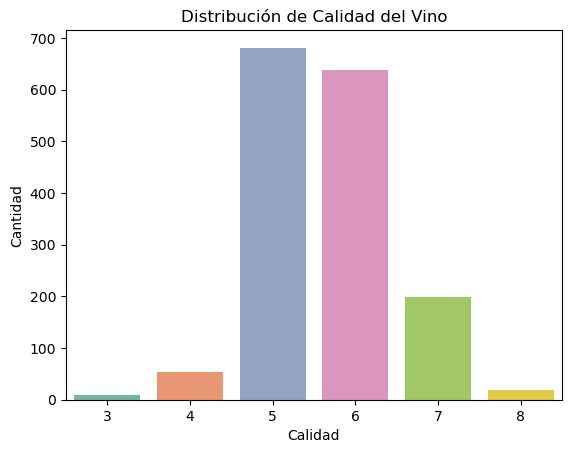

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Evaluación del modelo ---
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.76      0.67       130
           6       0.55      0.49      0.52       132
           7       0.45      0.36      0.40        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.27      0.27      0.26       320
weighted avg       0.53      0.56      0.54       320

Matriz de confusión:
[[ 0  0  1  0  0  0]
 [ 0  0  8  1  1  0]
 [ 0  1 99 28  2  0]
 [ 0  0 54 65 13  0]
 [ 0  0  5 22 15  0]
 [ 0  0  0  3  2  0]]


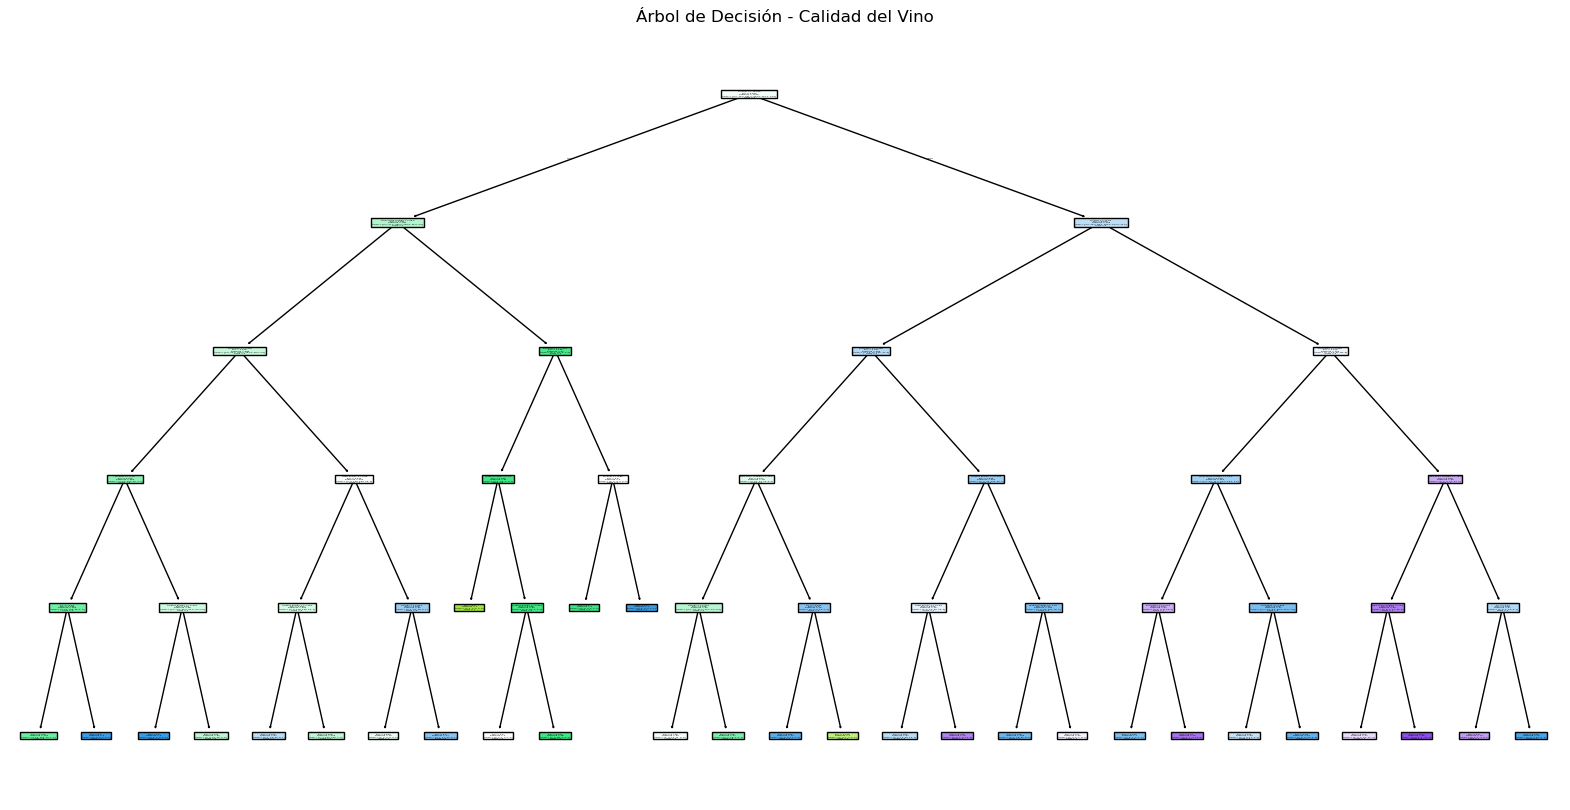

In [9]:
# --- Importar librerías ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# --- Cargar dataset ---
ruta = r"C:\Users\SM ZONA GAMER\Documents\UNAD\Quinto semestre\Otros\Analisis de datos\analisis de datos marilú\wineq\winequality-red.csv"
df = pd.read_csv(ruta)  # este CSV usa ';' como separador

# --- Exploración inicial ---
print("Primeras filas:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nDistribución de la calidad del vino:")
print(df['quality'].value_counts().sort_index())

# --- Visualización de correlaciones ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu", center=0)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# --- Distribución de clases ---
sns.countplot(x='quality', data=df, palette='Set2')
plt.title("Distribución de Calidad del Vino")
plt.xlabel("Calidad")
plt.ylabel("Cantidad")
plt.show()

# --- Preprocesamiento ---
X = df.drop('quality', axis=1)
y = df['quality']

# División Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Árbol de Decisión
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación
print("\n--- Evaluación del modelo ---")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del árbol
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())], filled=True)
plt.title("Árbol de Decisión - Calidad del Vino")
plt.show()
